Observations:
* Active volume differs if we apply parallel CNOT by calling x on entire register vs by calling x on each qubit, even though it's essentially the same circuit.
* In case when we doing a single call, active volume is not a linear function of $n$ (size of register), which makes it impossible to have exact symbolic resource estimation for any circuit using such syntax.

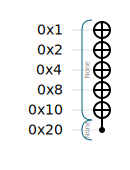

{'active_volume': 11,
 'gidney_lelbows': 0,
 'gidney_relbows': 0,
 'measurements': 0,
 'rotations': 0,
 'pprs': 0,
 'ppms': 0,
 't_gates': 0,
 'toffs': 0,
 'qubit_highwater': 6}

In [16]:

from psiqworkbench import QPU, Qubits, resource_estimator 
qpu = QPU()
qpu.reset(6)
a = Qubits(5,qpu=qpu)
b = Qubits(1,qpu=qpu)
a.x(b)
qpu.draw()
resource_estimator(qpu).resources()

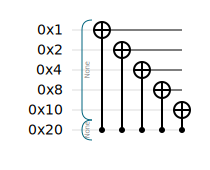

{'active_volume': 20,
 'gidney_lelbows': 0,
 'gidney_relbows': 0,
 'measurements': 0,
 'rotations': 0,
 'pprs': 0,
 'ppms': 0,
 't_gates': 0,
 'toffs': 0,
 'qubit_highwater': 6}

In [17]:
qpu = QPU()
qpu.reset(6)
a = Qubits(5,qpu=qpu)
b = Qubits(1,qpu=qpu)
for i in range(a.num_qubits):
    a[i].x(b)
qpu.draw()
resource_estimator(qpu).resources()


In [18]:
def f1(n):
    qpu = QPU()
    qpu.reset(n+1)
    a = Qubits(n,qpu=qpu)
    b = Qubits(1,qpu=qpu)
    a.x(b)
    return resource_estimator(qpu).resources()["active_volume"]

def f2(n):
    qpu = QPU()
    qpu.reset(n+1)
    a = Qubits(n,qpu=qpu)
    b = Qubits(1,qpu=qpu)
    for i in range(n):
        a[i].x(b)
    return resource_estimator(qpu).resources()["active_volume"]

for n in range(1, 10):
    print(n, f1(n), f2(n))

1 4 4
2 7 8
3 8 12
4 10 16
5 11 20
6 13 24
7 14 28
8 16 32
9 17 36
